## 1. import libraries

In [1]:
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import networkx as nx  
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt

# display settings (optional)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

In [ ]:
## 2. Load data

In [2]:
dfgreen = pd.read_csv('slcd_mrgd_innerNEWin.csv')
dfgreen.head()

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
0,357,TA,TA03,Amstel III deel A/B Noord,T,202406,4,4,0,0,4,100,100,4764,Amstel III deel A/B Noord,2,97,7.81,800491.96,21.57,389875.81,53.47,35637.61,4.45,4.77,9.22,44.25,354238.20,11.49,5.16,6.33
1,376,TF,TF02,Grunder/Koningshoef,T,202406,425,416,24,0,440,98,104,4793,Grunder/Koningshoef,1,14500,8.65,131388.59,25.10,57838.37,48.60,4731.01,3.60,4.58,8.18,40.42,53107.36,9.41,4.66,4.75
2,577,EK,EK03,Jan Maijenbuurt,E,202409-202410,260,251,0,0,251,97,97,4527,Jan Maijenbuurt,1,29359,0.00,78222.90,36.31,25461.52,39.48,1009.53,1.29,6.93,8.22,31.26,24451.99,18.84,4.49,14.35
3,1542,KK,KK04,Scheldebuurt Oost,K,202502-202503,512,497,5,0,502,97,98,4575,Scheldebuurt Oost,1,16775,0.00,140439.17,24.95,51886.30,51.37,5780.15,4.12,14.42,18.54,32.83,46106.16,28.17,6.13,22.04
4,545,EB,EB08,Zeeheldenbuurt,E,202409-202410,212,205,7,0,212,97,100,4422,Zeeheldenbuurt,1,22444,12.65,103570.96,30.98,37724.84,41.64,410.40,0.40,5.21,5.61,36.03,37314.44,11.54,2.91,8.63


In [ ]:
## 2.1 Parking pressure file and basic cleaning

In [3]:
#preparing the OLS with one regressor
# 1) Add constant
X = dfgreen[['perc_publ_totalgreen']]
X = sm.add_constant(X)
y = dfgreen['Netto_PKD']

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     30.22
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           7.02e-08
Time:                        16:43:34   Log-Likelihood:                -1767.6
No. Observations:                 389   AIC:                             3539.
Df Residuals:                     387   BIC:                             3547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   73.5233 

In [ ]:
# # Histogram
# histogram = sns.displot(df['a_vrouw'], kde=False)
# histogram.set(title='Women', xlabel='Number of Women', ylabel='Frequency')


In [ ]:
# #Kernel Density Plot
# kdp = sns.kdeplot(df['a_vrouw'], fill=True, clip=(0, None))
# kdp.set(title='Women', xlabel='Area code', ylabel='Density')

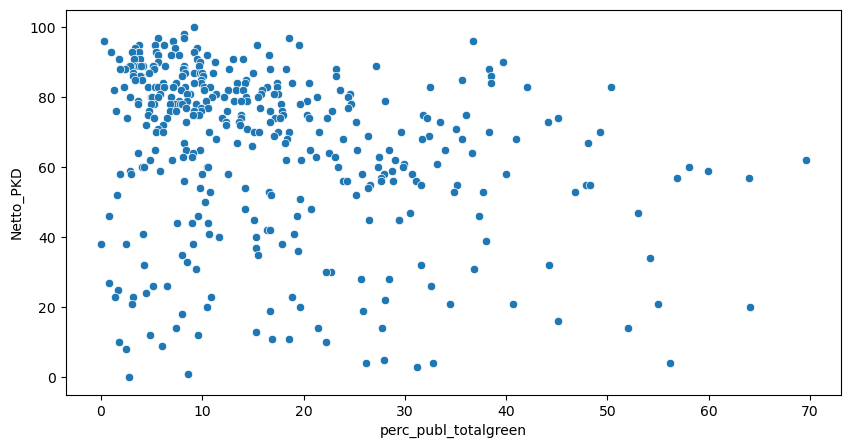

In [4]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='perc_publ_totalgreen', y='Netto_PKD', data=dfgreen, ax=ax);

In [5]:
dfpp = pd.read_csv('VKPARKEREN_R-2023-buurten.csv')
dfpp.head()

,Year,Geography,Code,Name,Parking facilities (1-10)
0,2005,buurten,AA02,Westelijke eilanden,5.9
1,2005,buurten,AA05,Haarlemmerbuurt-West,5.5
2,2005,buurten,AA06,Haarlemmerbuurt-Oost,5.0
3,2005,buurten,AB02,Driehoekbuurt,4.6
4,2005,buurten,AB07,Bloemgrachtbuurt,4.5


In [6]:
dfgp = pd.read_csv('ORGROEN_R-2023-buurten.csv')
dfgp.head()

,Year,Geography,Code,Name,Green spaces (1-10)
0,2019,buurten,AA02,Westelijke eilanden,6.9
1,2019,buurten,AA03,Westerdokseiland,5.8
2,2019,buurten,AA05,Haarlemmerbuurt-West,6.3
3,2019,buurten,AA06,Haarlemmerbuurt-Oost,5.6
4,2019,buurten,AB01,Marnixbuurt-Noord,6.9


In [7]:
#merging both databases as inner, to keep only the matched items
dfgrpp = pd.merge(dfgreen, dfpp, left_on='BRT_code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfgrpp = dfgrpp.sort_values(by=['BRT_code'], ascending=[True])
dfgrpp.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year,Geography,Code,Name,Parking facilities (1-10)
0,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0,4307.0,Planciusbuurt Noord,1.0,19296.0,26.14,24209.19,20.10,9131.32,42.44,139.07,0.57,4.73,5.30,37.14,8992.26,8.10,1.48,6.62,NaN,NaN,NaN,NaN,NaN
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2005.0,buurten,AA02,Westelijke eilanden,5.9
2,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2007.0,buurten,AA02,Westelijke eilanden,5.2
3,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2009.0,buurten,AA02,Westelijke eilanden,6.1
4,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2011.0,buurten,AA02,Westelijke eilanden,5.9
5,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2013.0,buurten,AA02,Westelijke eilanden,5.4
6,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2015.0,buurten,AA02,Westelijke eilanden,6.0
7,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2017.0,buurten,AA02,Westelijke eilanden,5.8
8,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9
9,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6


In [8]:
#merging both databases as inner, to keep only the matched items
dfgrpp = pd.merge(dfgrpp, dfgp, left_on='BRT_code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfgrpp = dfgrpp.sort_values(by=['BRT_code'], ascending=[True])
dfgrpp.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year_x,Geography_x,Code_x,Name_x,Parking facilities (1-10),Year_y,Geography_y,Code_y,Name_y,Green spaces (1-10)
0,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0,4307.0,Planciusbuurt Noord,1.0,19296.0,26.14,24209.19,20.10,9131.32,42.44,139.07,0.57,4.73,5.30,37.14,8992.26,8.10,1.48,6.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9
29,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1
28,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9
27,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2023.0,buurten,AA02,Westelijke eilanden,6.9
26,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2021.0,buurten,AA02,Westelijke eilanden,7.1
25,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2019.0,buurten,AA02,Westelijke eilanden,6.9
24,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9
23,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1
22,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9


In [9]:
dfgrppd = dfgrpp.dropna(subset=['Parking facilities (1-10)', 'Green spaces (1-10)'])
dfgrppd.head()

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year_x,Geography_x,Code_x,Name_x,Parking facilities (1-10),Year_y,Geography_y,Code_y,Name_y,Green spaces (1-10)
30,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9
29,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1
28,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9
27,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2023.0,buurten,AA02,Westelijke eilanden,6.9
26,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2021.0,buurten,AA02,Westelijke eilanden,7.1


In [10]:
dfgrppm = dfgrpp['Parking facilities (1-10)'] = dfgrpp['Parking facilities (1-10)'].fillna(dfgrpp['Parking facilities (1-10)'].mean())
dfgrppm.head()

0     6.296947
30    5.900000
29    5.900000
28    5.900000
27    5.600000
Name: Parking facilities (1-10), dtype: float64

In [11]:
dfgrppm['Green spaces (1-10)'] = dfgrppm['Green spaces (1-10)'].fillna(dfgrppm['Green spaces (1-10)'].mean())
dfgrppm.head()

KeyError: 'Green spaces (1-10)'

In [13]:
dfgrppm['Green spaces (1-10)'].dtype

KeyError: 'Green spaces (1-10)'

In [14]:
non_floats = dfgrppm[~dfgrppm['Green spaces (1-10)'].apply(lambda x: isinstance(x, float))]
print(non_floats)

KeyError: 'Green spaces (1-10)'

In [15]:
print(dfgrppm.columns.tolist())

AttributeError: 'Series' object has no attribute 'columns'

In [16]:
## regression with inner df for parking perception against real data
#preparing the OLS with one regressor
# 1) Add constant
X = dfgrppd[['Parking facilities (1-10)']]
X = sm.add_constant(X)
y = dfgrppd['Netto_PKD']

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     845.8
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          1.38e-175
Time:                        17:32:04   Log-Likelihood:                -28533.
No. Observations:                6955   AIC:                         5.707e+04
Df Residuals:                    6953   BIC:                         5.708e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

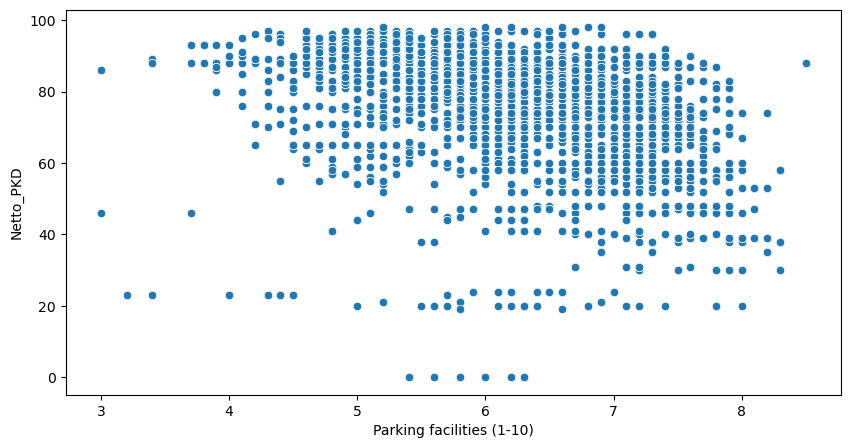

In [17]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='Parking facilities (1-10)', y='Netto_PKD', data=dfgrppd, ax=ax);

In [18]:
## regression with inner df for green perception against real data
#preparing the OLS with one regressor
# 1) Add constant
X = dfgrppd[['Green spaces (1-10)']]
X = sm.add_constant(X)
y = dfgrppd['perc_publ_totalgreen']

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())

                             OLS Regression Results                             
Dep. Variable:     perc_publ_totalgreen   R-squared:                       0.233
Model:                              OLS   Adj. R-squared:                  0.233
Method:                   Least Squares   F-statistic:                     2115.
Date:                  Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                          17:34:20   Log-Likelihood:                -26015.
No. Observations:                  6955   AIC:                         5.203e+04
Df Residuals:                      6953   BIC:                         5.205e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

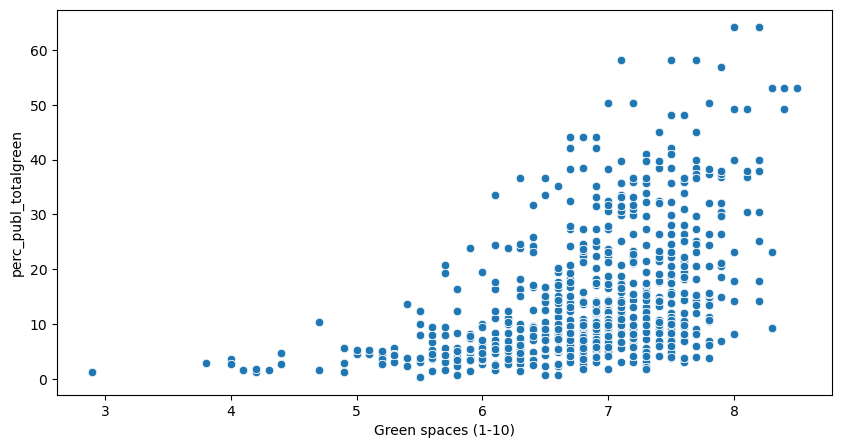

In [19]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='Green spaces (1-10)', y='perc_publ_totalgreen', data=dfgrppd, ax=ax);